In [1]:
from scipy.sparse import diags
import random
import numpy as np
import scipy as sc
import pandas as pd
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

import sys
sys.path.insert(0, '../python/')
from opt_utils import *
from grad_utils import *
from ks_utils import *
from simulation_utils import *
from cv_utils import *

# Generate synethic data

In [2]:
N = 50 # number of teams
T = 50 # number of seasons/rounds/years
tn = [1] * int(T * N * (N - 1)/2) # number of games between each pair of teams

### Gaussian Process

In [3]:
[alpha,r] = [1,1]
##### get beta here #####
random.seed(0)
np.random.seed(0)
beta_gp = beta_gaussian_process(N, T, mu_parameters = [0,0.1], cov_parameters = [alpha,r], mu_type = 'constant', cov_type = 'toeplitz')
game_matrix_list = get_game_matrix_list(N,T,tn,beta_gp)

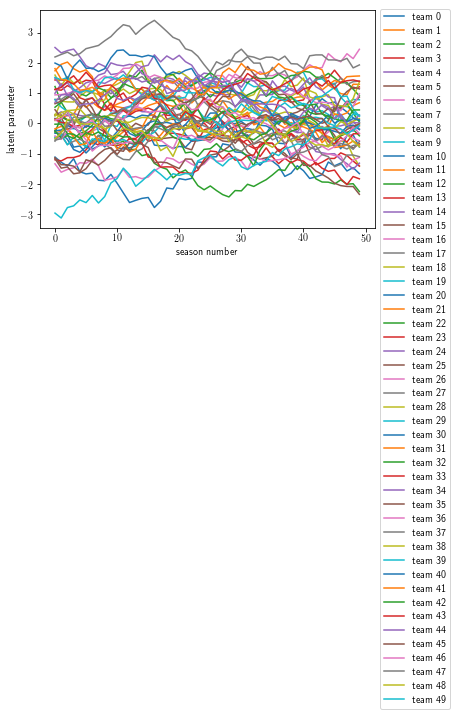

In [4]:
latent = beta_gp
for i in range(N):
    plt.plot(latent[:,i], label="team %d"%i)
plt.xlabel("season number")
plt.ylabel("latent parameter")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03, 1, 0))

In [5]:
data = game_matrix_list # shape: T*N*N

In [6]:
# true beta
beta_true = beta_gp + 0

In [7]:
beta_true.shape

(50, 50)

## Kernel method

## $h = T^{-3/4}$

In [8]:
T = 50

In [9]:
T**(-3/4)

0.053182958969449884

In [10]:
1/12 * T**(-1/5)

0.03810875432727719

In [11]:
T, N = data.shape[0:2]
ks_data = kernel_smooth(data,T**(-3/4))

In [12]:
ks_data[1,:,:]

array([[0.00000000e+00, 2.09886531e-01, 2.02855701e-01, ...,
        6.74694086e-01, 1.35556418e-06, 9.83360697e-01],
       [7.90113469e-01, 0.00000000e+00, 3.75970603e-01, ...,
        5.58723715e-01, 7.15148601e-01, 1.00000000e+00],
       [7.97144299e-01, 6.24029397e-01, 0.00000000e+00, ...,
        8.93277720e-01, 5.27527379e-01, 1.00000000e+00],
       ...,
       [3.25305914e-01, 4.41276285e-01, 1.06722280e-01, ...,
        0.00000000e+00, 5.03073285e-01, 1.00000000e+00],
       [9.99998644e-01, 2.84851399e-01, 4.72472621e-01, ...,
        4.96926715e-01, 0.00000000e+00, 9.99992034e-01],
       [1.66393027e-02, 1.72164132e-12, 2.36760671e-11, ...,
        2.79910367e-10, 7.96643881e-06, 0.00000000e+00]])

In [13]:
objective_pgd, beta_pgd = gd_bt(data = ks_data,verbose=True)

initial objective value: 42455.264809
1-th GD, objective value: 34580.483960
2-th GD, objective value: 33366.122825
3-th GD, objective value: 33331.648138
4-th GD, objective value: 33325.602475
5-th GD, objective value: 33323.236828
6-th GD, objective value: 33323.027827
7-th GD, objective value: 33322.991626
8-th GD, objective value: 33322.965356
9-th GD, objective value: 33322.959754
10-th GD, objective value: 33322.955306
11-th GD, objective value: 33322.954287
12-th GD, objective value: 33322.953453
13-th GD, objective value: 33322.953254
14-th GD, objective value: 33322.953090
15-th GD, objective value: 33322.953050
16-th GD, objective value: 33322.953017
17-th GD, objective value: 33322.953008
18-th GD, objective value: 33322.953001
19-th GD, objective value: 33322.953000
20-th GD, objective value: 33322.952998
21-th GD, objective value: 33322.952998
22-th GD, objective value: 33322.952997
23-th GD, objective value: 33322.952997
24-th GD, objective value: 33322.952997
25-th GD, o

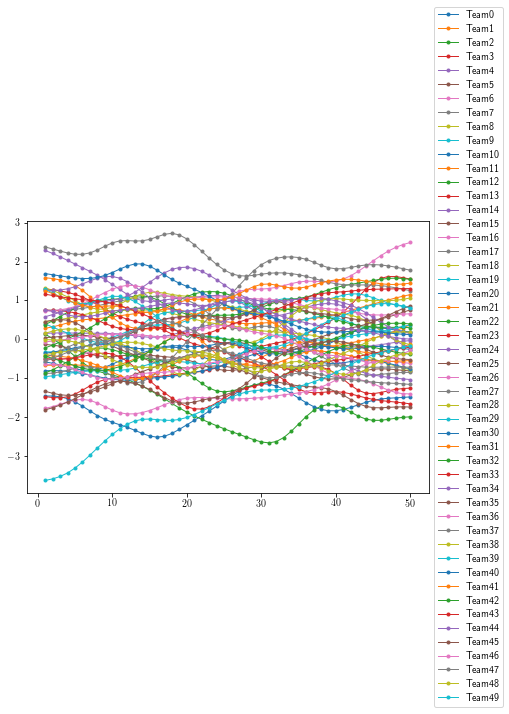

In [14]:
T, N = data.shape[0:2]
beta = beta_pgd.reshape((T,N))
f = plt.figure(1, figsize = (9,5))
ax = plt.subplot(111)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],marker = '.',label = 'Team' + str(i),linewidth=1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# f.savefig("l2_sq_solution.pdf", bbox_inches='tight')

### if one wants to try fixed h

In [15]:
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
h = 0.0311
loo_nll_DBT, beta_DBT, loo_prob_DBT = loo_DBT(data, h, gd_bt, num_loo = 200, return_prob = True, out = "notebook")

print("--- %s seconds ---" % (time.time() - start_time))

1-th cv done
2-th cv done
3-th cv done
4-th cv done
5-th cv done
6-th cv done
7-th cv done
8-th cv done
9-th cv done
10-th cv done
11-th cv done
12-th cv done
13-th cv done
14-th cv done
15-th cv done
16-th cv done
17-th cv done
18-th cv done
19-th cv done
20-th cv done
21-th cv done
22-th cv done
23-th cv done
24-th cv done
25-th cv done
26-th cv done
27-th cv done
28-th cv done
29-th cv done
30-th cv done
31-th cv done
32-th cv done
33-th cv done
34-th cv done
35-th cv done
36-th cv done
37-th cv done
38-th cv done
39-th cv done
40-th cv done
41-th cv done
42-th cv done
43-th cv done
44-th cv done
45-th cv done
46-th cv done
47-th cv done
48-th cv done
49-th cv done
50-th cv done
51-th cv done
52-th cv done
53-th cv done
54-th cv done
55-th cv done
56-th cv done
57-th cv done
58-th cv done
59-th cv done
60-th cv done
61-th cv done
62-th cv done
63-th cv done
64-th cv done
65-th cv done
66-th cv done
67-th cv done
68-th cv done
69-th cv done
70-th cv done
71-th cv done
72-th cv done
7

In [16]:
# winrate
random.seed(0)
np.random.seed(0)
winrate = get_winrate(data)
loo_nll_wr, loo_prob_wr = loo_winrate(data)

In [17]:
loo_prob_wr

0.4416666666666667

In [18]:
# vanilla BT
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
objective_vanilla_bt, beta_vanilla_bt = gd_bt(data = data,verbose = True)
loo_nll_vBT, loo_prob_vBT = loo_vBT(data,num_loo = 200)

print("--- %s seconds ---" % (time.time() - start_time))

initial objective value: 42455.264809
1-th GD, objective value: 33313.463052
2-th GD, objective value: 31711.968094
3-th GD, objective value: 31628.002577
4-th GD, objective value: 31598.978208
5-th GD, objective value: 31596.463607
6-th GD, objective value: 31595.729089
7-th GD, objective value: 31595.362947
8-th GD, objective value: 31594.986293
9-th GD, objective value: 31594.873299
10-th GD, objective value: 31594.816373
11-th GD, objective value: 31594.701888
12-th GD, objective value: 31594.670487
13-th GD, objective value: 31594.618966
14-th GD, objective value: 31594.595323
15-th GD, objective value: 31594.575781
16-th GD, objective value: 31594.560880
17-th GD, objective value: 31594.548230
18-th GD, objective value: 31594.526181
19-th GD, objective value: 31594.514249
20-th GD, objective value: 31594.504221
21-th GD, objective value: 31594.498064
22-th GD, objective value: 31594.481789
23-th GD, objective value: 31594.476150
24-th GD, objective value: 31594.464596
25-th GD, o

203-th GD, objective value: 31594.322213
204-th GD, objective value: 31594.322075
205-th GD, objective value: 31594.322007
206-th GD, objective value: 31594.321898
207-th GD, objective value: 31594.321828
208-th GD, objective value: 31594.321759
209-th GD, objective value: 31594.321703
210-th GD, objective value: 31594.321578
211-th GD, objective value: 31594.321509
212-th GD, objective value: 31594.321438
213-th GD, objective value: 31594.321391
214-th GD, objective value: 31594.321256
215-th GD, objective value: 31594.321203
216-th GD, objective value: 31594.321085
217-th GD, objective value: 31594.321019
218-th GD, objective value: 31594.320952
219-th GD, objective value: 31594.320908
220-th GD, objective value: 31594.320780
221-th GD, objective value: 31594.320729
222-th GD, objective value: 31594.320619
223-th GD, objective value: 31594.320556
224-th GD, objective value: 31594.320492
225-th GD, objective value: 31594.320450
226-th GD, objective value: 31594.320330
227-th GD, objec

403-th GD, objective value: 31594.313240
404-th GD, objective value: 31594.313207
405-th GD, objective value: 31594.313188
406-th GD, objective value: 31594.313168
407-th GD, objective value: 31594.313156
408-th GD, objective value: 31594.313118
409-th GD, objective value: 31594.313104
410-th GD, objective value: 31594.313071
411-th GD, objective value: 31594.313053
412-th GD, objective value: 31594.313034
413-th GD, objective value: 31594.313021
414-th GD, objective value: 31594.312986
415-th GD, objective value: 31594.312971
416-th GD, objective value: 31594.312940
417-th GD, objective value: 31594.312921
418-th GD, objective value: 31594.312903
419-th GD, objective value: 31594.312891
420-th GD, objective value: 31594.312856
421-th GD, objective value: 31594.312842
422-th GD, objective value: 31594.312813
423-th GD, objective value: 31594.312794
424-th GD, objective value: 31594.312776
425-th GD, objective value: 31594.312764
426-th GD, objective value: 31594.312731
427-th GD, objec

603-th GD, objective value: 31594.310205
604-th GD, objective value: 31594.310190
605-th GD, objective value: 31594.310181
606-th GD, objective value: 31594.310173
607-th GD, objective value: 31594.310167
608-th GD, objective value: 31594.310150
609-th GD, objective value: 31594.310143
610-th GD, objective value: 31594.310130
611-th GD, objective value: 31594.310120
612-th GD, objective value: 31594.310112
613-th GD, objective value: 31594.310106
614-th GD, objective value: 31594.310090
615-th GD, objective value: 31594.310083
616-th GD, objective value: 31594.310070
617-th GD, objective value: 31594.310063
618-th GD, objective value: 31594.310055
619-th GD, objective value: 31594.310049
620-th GD, objective value: 31594.310034
621-th GD, objective value: 31594.310027
622-th GD, objective value: 31594.310015
623-th GD, objective value: 31594.310007
624-th GD, objective value: 31594.309999
625-th GD, objective value: 31594.309993
626-th GD, objective value: 31594.309979
627-th GD, objec

803-th GD, objective value: 31594.308682
804-th GD, objective value: 31594.308674
805-th GD, objective value: 31594.308669
806-th GD, objective value: 31594.308664
807-th GD, objective value: 31594.308660
808-th GD, objective value: 31594.308651
809-th GD, objective value: 31594.308647
810-th GD, objective value: 31594.308639
811-th GD, objective value: 31594.308634
812-th GD, objective value: 31594.308629
813-th GD, objective value: 31594.308626
814-th GD, objective value: 31594.308617
815-th GD, objective value: 31594.308613
816-th GD, objective value: 31594.308606
817-th GD, objective value: 31594.308602
818-th GD, objective value: 31594.308597
819-th GD, objective value: 31594.308594
820-th GD, objective value: 31594.308585
821-th GD, objective value: 31594.308581
822-th GD, objective value: 31594.308574
823-th GD, objective value: 31594.308569
824-th GD, objective value: 31594.308565
825-th GD, objective value: 31594.308561
826-th GD, objective value: 31594.308553
827-th GD, objec

In [19]:
loo_nll_vBT

0.6117792687806071

In [20]:
loo_prob_vBT

0.38814557432803826

In [21]:
rank_dif_estimator = [0] * 3
beta_all = [winrate,beta_vanilla_bt,beta_DBT]
for i in range(len(rank_dif_estimator)):
    betai = beta_all[i]
    rank_dif_estimator[i] = np.mean(av_dif_rank(beta_true,betai))
rank_dif_estimator

df = pd.DataFrame({'estimator':['winrate','vanilla BT','DBT'],'average rank difference':rank_dif_estimator,
                  'LOO Prob':[loo_prob_wr,loo_prob_vBT,loo_prob_DBT],
                   'LOO nll':[loo_nll_wr,loo_nll_vBT,loo_nll_DBT]})

In [22]:
print(df.to_latex(index_names=True, escape=False, index=False, 
                          column_format='c|c|c|c|', float_format="{:0.2f}".format,
                          header=True, bold_rows=True))

\begin{tabular}{c|c|c|c|}
\toprule
 LOO Prob &  LOO nll &  average rank difference &   estimator \\
\midrule
     0.44 &     0.00 &                     3.66 &     winrate \\
     0.39 &     0.61 &                     3.66 &  vanilla BT \\
     0.38 &     0.57 &                     2.19 &         DBT \\
\bottomrule
\end{tabular}



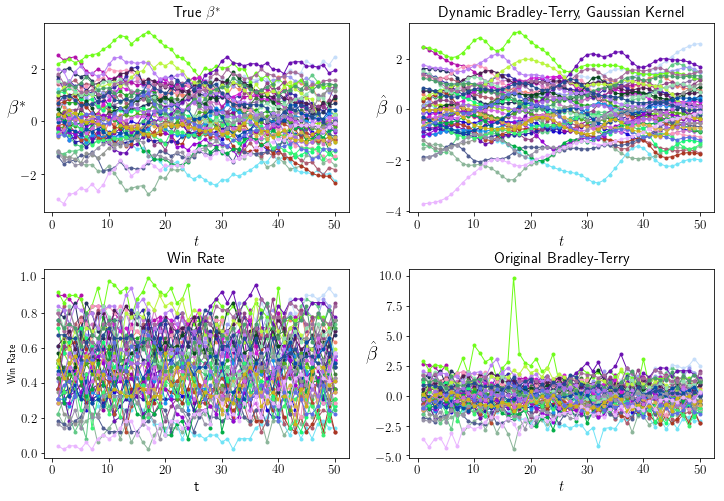

In [23]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (12,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_true.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"True $\beta^*$",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^*$",fontsize = size_ylabel,rotation = "horizontal")
    bottom, top = plt.ylim()
    
beta = beta_DBT.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
#     plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel("t",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


# ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vanilla_bt.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Original Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
f.savefig("compare_beta_NT50_n1.pdf", bbox_inches='tight')

## repeated experiment

In [24]:
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
B = 20
loo_ks = 300
loo = 300
h_cv_list = []
rank_diff_DBT_list, loo_nll_DBT_list, loo_prob_DBT_list = [], [], []
rank_diff_wr_list, loo_nll_wr_list, loo_prob_wr_list = [], [], []
rank_diff_vBT_list, loo_nll_vBT_list, loo_prob_vBT_list = [], [], []

for b in range(B):
    N = 50 # number of teams
    T = 50 # number of seasons/rounds/years
    tn = [1] * int(T * N * (N - 1)/2) # number of games between each pair of teams

    [alpha,r] = [1,1]
    ##### get beta here #####
    beta_gp = beta_gaussian_process(N, T, mu_parameters = [0,0.1], 
                                    cov_parameters = [alpha,r], mu_type = 'constant', cov_type = 'toeplitz')
    game_matrix_list = get_game_matrix_list(N,T,tn,beta_gp)

    data = game_matrix_list # shape: T*N*N

    # true beta
    beta_true = beta_gp + 0

    # ks cv
    h_list = np.linspace(0.1, 0.01, 10)
    h_cv, nll_cv, beta_cv, prob_cv = loocv_ks(data, h_list, gd_bt, num_loocv = loo_ks, verbose = False,
                                              return_prob = True, out = "notebook")
    h_cv_list.append(h_cv)
    loo_nll_DBT_list.append(max(nll_cv)) 
    loo_prob_DBT_list.append(prob_cv[np.argmax(nll_cv)])
    rank_diff_DBT_list.append(np.mean(av_dif_rank(beta_true,beta_cv)))
    
#     # fixed h
#     h_cv = 1/12 * T**(-1/5)
#     nll_cv, beta_cv, prob_cv = loo_DBT(data, h_cv, gd_bt, num_loo = 200, return_prob = True, out = "notebook")

#     h_cv_list.append(h_cv)
#     loo_nll_DBT_list.append(nll_cv) 
#     loo_prob_DBT_list.append(prob_cv)
#     rank_diff_DBT_list.append(np.mean(av_dif_rank(beta_true,beta_cv)))
    
    winrate = get_winrate(data)
    loo_nll_wr, loo_prob_wr = loo_winrate(data,num_loo = loo)
    loo_nll_wr_list.append(loo_nll_wr)
    loo_prob_wr_list.append(loo_prob_wr)
    rank_diff_wr_list.append(np.mean(av_dif_rank(beta_true,winrate)))
    
    objective_vanilla_bt, beta_vBT = gd_bt(data = data)
    loo_nll_vBT, loo_prob_vBT = loo_vBT(data,num_loo = loo)
    loo_nll_vBT_list.append(loo_nll_vBT)
    loo_prob_vBT_list.append(loo_prob_vBT)
    rank_diff_vBT_list.append(np.mean(av_dif_rank(beta_true,beta_vBT)))
    
    print(str(b) + '-th repeat finished.')
    print("--- %s seconds ---" % (time.time() - start_time))
    
    
rank_dif_estimator = [np.mean(rank_diff_wr_list),
                     np.mean(rank_diff_vBT_list),
                     np.mean(rank_diff_DBT_list)]
loo_prob_wr = np.mean(loo_prob_wr_list)
loo_prob_vBT = np.mean(loo_prob_vBT_list)
loo_prob_DBT = np.mean(loo_prob_DBT_list)


loo_nll_wr = np.mean(loo_nll_wr_list)
loo_nll_vBT = np.mean(loo_nll_vBT_list)
loo_nll_DBT = np.mean(loo_nll_DBT_list)

df = pd.DataFrame({'estimator':['winrate','vanilla BT','DBT'],'average rank difference':rank_dif_estimator,
                  'LOO Prob':[loo_prob_wr,loo_prob_vBT,loo_prob_DBT],
                   'LOO nll':[loo_nll_wr,loo_nll_vBT,loo_nll_DBT]})

print("--- %s seconds ---" % (time.time() - start_time))

0-th repeat finished.
--- 14307.758041381836 seconds ---
1-th repeat finished.
--- 28772.645342350006 seconds ---
2-th repeat finished.
--- 42586.16912817955 seconds ---
3-th repeat finished.
--- 56789.73691225052 seconds ---
4-th repeat finished.
--- 70319.4774544239 seconds ---
5-th repeat finished.
--- 84160.17943572998 seconds ---
6-th repeat finished.
--- 99397.67303109169 seconds ---
7-th repeat finished.
--- 115050.7640349865 seconds ---
8-th repeat finished.
--- 130710.03309226036 seconds ---
9-th repeat finished.
--- 145041.3039803505 seconds ---
10-th repeat finished.
--- 171909.3375697136 seconds ---
11-th repeat finished.
--- 185493.11561870575 seconds ---
12-th repeat finished.
--- 198870.08283615112 seconds ---
13-th repeat finished.
--- 212590.2770140171 seconds ---
14-th repeat finished.
--- 226149.3223862648 seconds ---
15-th repeat finished.
--- 239937.13080739975 seconds ---
16-th repeat finished.
--- 253601.132168293 seconds ---
17-th repeat finished.
--- 267658.337

In [25]:
h_cv_list

[0.01999999999999999,
 0.03,
 0.01999999999999999,
 0.03,
 0.03,
 0.06,
 0.01999999999999999,
 0.049999999999999996,
 0.03,
 0.01999999999999999,
 0.01,
 0.01999999999999999,
 0.01999999999999999,
 0.039999999999999994,
 0.01999999999999999,
 0.03,
 0.01999999999999999,
 0.01999999999999999,
 0.01,
 0.06]

In [26]:
print(df.to_latex(index_names=True, escape=False, index=False, 
                          column_format='c|c|c|c|', float_format="{:0.2f}".format,
                          header=True, bold_rows=True))

\begin{tabular}{c|c|c|c|}
\toprule
 LOO Prob &  LOO nll &  average rank difference &   estimator \\
\midrule
     0.44 &     0.00 &                     3.72 &     winrate \\
     0.36 &     0.56 &                     3.72 &  vanilla BT \\
     0.37 &     0.55 &                     2.42 &         DBT \\
\bottomrule
\end{tabular}



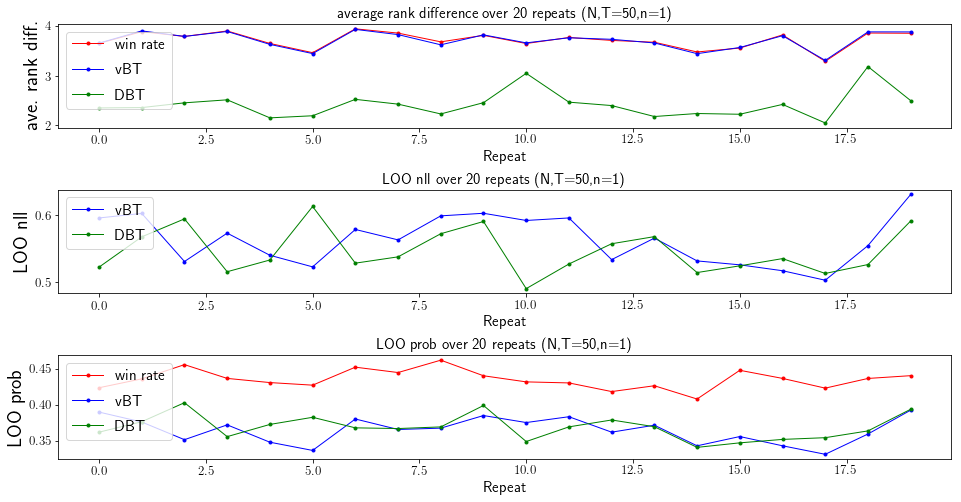

In [27]:
f = plt.figure(1, figsize = (16,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_list = ['red','blue','green']
x_range = [i for i in range(B)]

ax = plt.subplot(311)
ax.plot(x_range,rank_diff_wr_list,c=color_list[0],marker = '.',label = 'win rate',linewidth=1)
ax.plot(x_range,rank_diff_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,rank_diff_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"average rank difference over 20 repeats (N,T=50,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"ave. rank diff.",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)
    
ax = plt.subplot(312)
ax.plot(x_range,loo_nll_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,loo_nll_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"LOO nll over 20 repeats (N,T=50,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"LOO nll",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)

ax = plt.subplot(313)
ax.plot(x_range,loo_prob_wr_list,c=color_list[0],marker = '.',label = 'win rate',linewidth=1)
ax.plot(x_range,loo_prob_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,loo_prob_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"LOO prob over 20 repeats (N,T=50,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"LOO prob",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)


plt.subplots_adjust(hspace = 0.6)
plt.show()
f.savefig("perform_NT50_n1_BT.pdf", bbox_inches='tight')

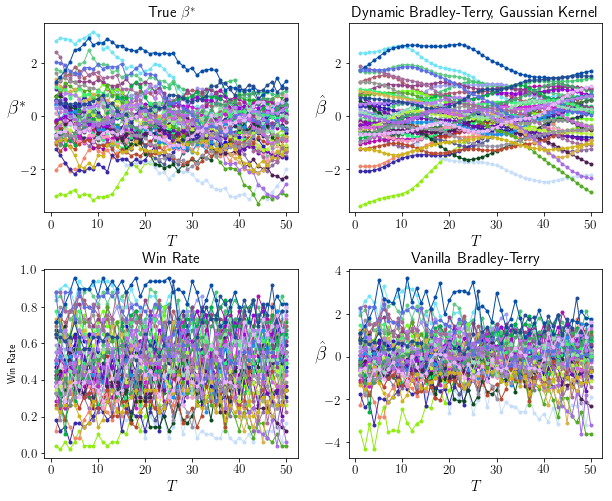

In [28]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_true.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"True $\beta^*$",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^*$",fontsize = size_ylabel,rotation = "horizontal")
    bottom, top = plt.ylim()
    
beta = beta_cv.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


# ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vBT.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Vanilla Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
f.savefig("compare_beta_NT50_n1_BT.pdf", bbox_inches='tight')

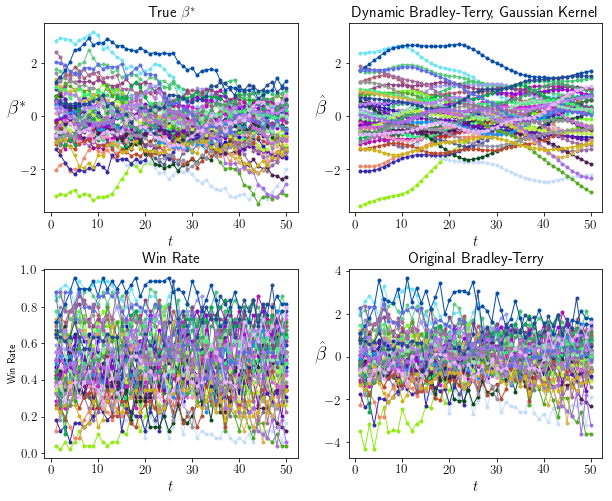

In [29]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_true.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"True $\beta^*$",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^*$",fontsize = size_ylabel,rotation = "horizontal")
    bottom, top = plt.ylim()
    
beta = beta_cv.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


# ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vBT.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Original Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
f.savefig("compare.pdf", bbox_inches='tight')

In [30]:
1/12 * T**(-1/5)

0.03810875432727719